In [80]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


In [81]:
heart = pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

Let's firstly have a look at the first few rows of the dataset. 

In [82]:
print(heart.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Firstly, let's look at a boxplot. Here 0 indicates that there is no precense of heart disease whereas 1 indicates there is a heart disease present.

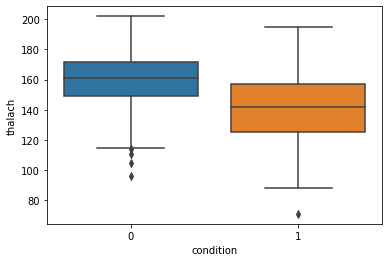

In [83]:
sns.boxplot(x = heart.condition, y = heart.thalach)
plt.show()

Now, we'll explore the difference in mean thalach for patients with heart disease compared to patients without

In [84]:
thalach_hd = heart.thalach[heart['condition'] == 1]
thalach_no_hd = heart.thalach[heart['condition'] == 0]
mean_diff = np.mean(thalach_hd) - np.mean(thalach_no_hd)
print('The thalach mean differnce is ', mean_diff)


The thalach mean differnce is  -19.471760948905114


Clearly, there is a large difference is the mean average heart rate between those with heart disease and those without. Now, we can try and find out if there is a significant difference. In this hypothesis test the null is that the average thalach of a person with heart disease is the same as a person without heart disease. The alternative being the opposite, that the average thalach for a person with heart disease is not equal to the average thalach of a person without heart disease. 

In [85]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('The pval for the average thalach of a hd patient vs the avg thalach of no hd patient ', pval)

The pval for the average thalach of a hd patient vs the avg thalach of no hd patient  2.239715323393672e-14


Here the p-value for the two sample t-test is lower than the signicance threshold and so we should reject the null hypothesis. Now, I'll look at the association between cholestrol and heart disease. 

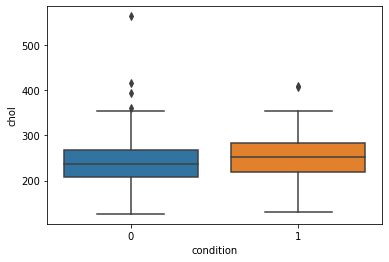

In [86]:
plt.clf()
sns.boxplot(x=heart.condition, y=heart.chol)
plt.show()

From the box plot we can see that the median values of the two are very similiar as well as the standard deviation. Those without heart disease have a greater number of outliers, however. Let's now run a two sample t-test to investigate further association 

In [87]:
chol_hd = heart.chol[heart['condition'] == 1]
chol_no_hd = heart.chol[heart['condition'] == 0]
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print('The pval for measuring the cholestrol between a group with heart disease and those without is ', pval)

The pval for measuring the cholestrol between a group with heart disease and those without is  0.16758776714742368


This is above our significance threshold of 0.05 and therefore there is no significant association between the two variables. Now, let's investigate the relationship between maximum heart rate achieved during exercise and chest pain types 

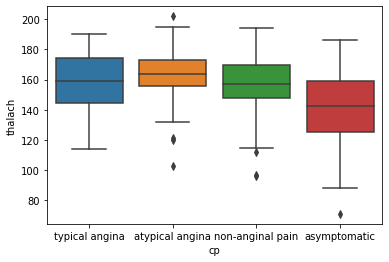

In [100]:
heart["cp"].replace({0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"}, inplace=True)
plt.clf()
sns.boxplot(x = heart.cp, y = heart.thalach)
plt.show()

From the boxplot we can see that the heart rate median for asymptomatic chest pain is lower. The other chest pain types have a similiar median. The standard deviation for asymptomatic chest pain is much higher. This means that there are are a wider range of thlach values for it. Let's look at this further in a histogram to visualise further the spread.

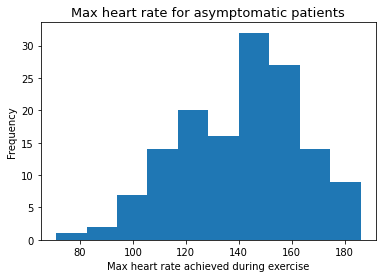

In [103]:
plt.clf()
plt.hist(heart.thalach[heart.cp == 'asymptomatic'])
plt.title('Max heart rate for asymptomatic patients', size=13)
plt.xlabel('Max heart rate achieved during exercise')
plt.ylabel('Frequency')
plt.show()

In [105]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']
from scipy.stats import f_oneway
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('The pval of the analysis of variance for all four is ', pval)

The pval of the analysis of variance for all four is  1.2650429914553747e-10


This is a p-value is well below 0.05 and therefore shows at least one pair of chest pain categories have a significantly differnt thalach. Let's find out which using the Tukey's Range test. 

In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  22.2396  0.001  13.1595 31.3197   True
    asymptomatic non-anginal pain  14.9617  0.001   7.3895  22.534   True
    asymptomatic   typical angina  15.4002 0.0075   3.0819 27.7185   True
 atypical angina non-anginal pain  -7.2778 0.2284 -17.1512  2.5955  False
 atypical angina   typical angina  -6.8394 0.5698 -20.6917  7.0129  False
non-anginal pain   typical angina   0.4384    0.9 -12.4757 13.3526  False
-------------------------------------------------------------------------


With regards to rejecting the hypothesis, we must do so with asymptomatic and atypical, asympotmatic and non-anginal pain, asymptomatic and typical angina. In other words, asymptomatic variable and any other chest pain variable the pval is significant. Therefore, we can reject the hypothesis. The most signicant is asymptomatic and atypical angina, using an overall type I error rate of 0.05 for all 6 comparisons. 

Let's now investigate the relationship between the type of chest pain a person experiences and whether or not they have heart disease. These are both categorical variables and so I'll use a contingency table to begin.

In [108]:
Xtab = pd.crosstab(heart.cp, heart.condition)
print(Xtab)

condition          0    1
cp                       
asymptomatic      39  103
atypical angina   40    9
non-anginal pain  65   18
typical angina    16    7


Let's see if we can reject the null - that there is not an association between chest pain type and where or not someone is diagnosed with heart disease. 

In [109]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(Xtab)
print('The pval of the Chi-Square test is ', pval)

The pval of the Chi-Square test is  1.1782838465918115e-16


This p-value tells use there is a signicant association between chest pain type and heart disease. Let's see if we can tell if an age of a person is predictive of whether or not they have heart disease.

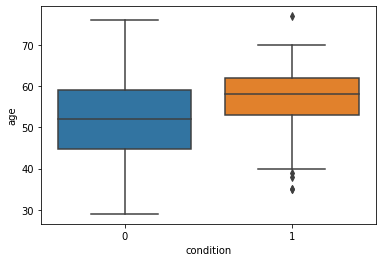

In [110]:
plt.clf()
sns.boxplot(x = heart.condition, y = heart.age)
plt.show()

It appears that those who have heart disease have a median higher age. Whilst those who do not have a lower median age and have a greater standard deviation. I'll now find the p-value to see if the suspected association between variables can be confirmed. The null is that these variables are not associated 

In [112]:
age_hd = heart.age[heart['condition'] == 1]
age_no_hd = heart.age[heart['condition'] == 0]
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('The pval for the two-sample t test between age and heart disease is ', pval)


The pval for the two-sample t test between age and heart disease is  7.862867945608019e-05


This suggests that there is a siginificant association as the p-value is below the significance threshold (0.05)